In [1]:
import pandas as pd
import sklearn
import numpy as np
import util
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
import pydotplus
from dmba import plotDecisionTree, classificationSummary, regressionSummary

In [3]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, BayesianRidge 
import statsmodels.formula.api as sm 
import matplotlib.pylab as plt 
from dmba import regressionSummary, exhaustive_search 
from dmba import adjusted_r2_score, AIC_score, BIC_score

In [4]:
pd.set_option('max_columns', None)

In [6]:
ksi_collapse = pd.read_csv('Data/KSI_Collapse_Count.csv', index_col = 0)
hazardous_df = pd.read_csv('Data/Hazardous_Driving_Areas_Toronto.csv')
road_df = pd.read_csv('Data/Road_Impediments_Toronto.csv')

In [5]:
#df = pd.read_csv('Data/Hazardous_KSI_Merge.csv', index_col = 0)
df2 = pd.read_csv('Data/Hazardous_KSI_Merge_round2.csv', index_col = 0)
df3 = pd.read_csv('Data/KSI_Reg_Collapse.csv', index_col = 0)

In [33]:
df2.sort_values(by = 'COUNT', ascending = False)

,Latitude,Longitude,IncidentsTotal,SeverityScore,LATITUDE,LONGITUDE,COUNT
75,43.65,-79.38,441,0.012690,43.65,-79.38,84
76,43.65,-79.37,241,0.010583,43.65,-79.37,76
58,43.64,-79.38,1042,0.014000,43.64,-79.38,61
59,43.64,-79.37,1028,0.025423,43.64,-79.37,61
74,43.65,-79.39,31,0.012000,43.65,-79.39,54
...,...,...,...,...,...,...,...
287,43.73,-79.62,153,0.014000,43.73,-79.62,1
157,43.69,-79.59,79,0.010750,43.69,-79.59,1
505,43.80,-79.24,54,0.017250,43.80,-79.24,1
108,43.67,-79.57,191,0.003467,43.67,-79.57,1


In [51]:
road_df['Latitude'] = road_df['Latitude'].apply(util.truncate, args = (2, ))
road_df['Longitude'] = road_df['Longitude'].apply(util.truncate, args = (2, ))

In [52]:
road_df

,Geohash,GeohashBounds,Latitude_SW,Longitude_SW,Latitude_NE,Longitude_NE,Location,Latitude,Longitude,City,County,State,Country,ISO_3166_2,AvgAcceleration,PercentOfVehicles,PercentCar,PercentMPV,PercentLDT,PercentMDT,PercentHDT,PercentOther,UpdateDate,Version
0,dpz2yfwh,"POLYGON((-79.4998168945312 43.7400054931641, -...",43.740,-79.500,43.740,-79.499,POINT(-79.49973 43.74017),43.74,-79.50,Toronto,NaN,Ontario,Canada,CA-ON,1.138,0.130,0.000,0.087,0.130,0.044,0.261,0.478,2021-07-20,3.1
1,dpz8u7gy,"POLYGON((-79.2612075805664 43.7472152709961, -...",43.747,-79.261,43.747,-79.261,POINT(-79.26096 43.74731),43.74,-79.26,Toronto,NaN,Ontario,Canada,CA-ON,0.452,0.035,0.018,0.312,0.477,0.047,0.024,0.124,2021-07-20,3.1
2,dpz9m1ny,"POLYGON((-79.2241287231445 43.8199996948242, -...",43.820,-79.224,43.820,-79.224,POINT(-79.22411 43.82008),43.82,-79.22,Toronto,NaN,Ontario,Canada,CA-ON,1.269,0.001,0.026,0.129,0.459,0.052,0.197,0.137,2021-07-20,3.1
3,dpz8dkqx,"POLYGON((-79.3453216552734 43.7061882019043, -...",43.706,-79.345,43.706,-79.345,POINT(-79.34521 43.70632),43.70,-79.34,Toronto,NaN,Ontario,Canada,CA-ON,0.275,0.065,0.046,0.296,0.299,0.125,0.147,0.087,2021-07-20,3.1
4,dpz91gd3,"POLYGON((-79.3731307983398 43.7889289855957, -...",43.789,-79.373,43.789,-79.373,POINT(-79.37311 43.78904),43.78,-79.37,Toronto,NaN,Ontario,Canada,CA-ON,0.400,0.183,0.049,0.409,0.359,0.028,0.063,0.091,2021-07-20,3.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,dpz83fub,"POLYGON((-79.3696975708008 43.6528015136719, -...",43.653,-79.370,43.653,-79.369,POINT(-79.36953 43.65292),43.65,-79.37,Toronto,NaN,Ontario,Canada,CA-ON,0.784,0.056,0.354,0.090,0.264,0.021,0.090,0.181,2021-07-20,3.1
49996,dpz2v9nm,"POLYGON((-79.5544052124023 43.7319374084473, -...",43.732,-79.554,43.732,-79.554,POINT(-79.55418 43.73206),43.73,-79.55,Toronto,NaN,Ontario,Canada,CA-ON,0.579,0.023,0.031,0.132,0.403,0.078,0.171,0.186,2021-07-20,3.1
49997,dpz88k9q,"POLYGON((-79.4404220581055 43.707389831543, -7...",43.707,-79.440,43.708,-79.440,POINT(-79.44013 43.70749),43.70,-79.44,Toronto,NaN,Ontario,Canada,CA-ON,0.440,0.000,0.042,0.180,0.446,0.082,0.113,0.138,2021-07-20,3.1
49998,dpz2tcsn,"POLYGON((-79.5465087890625 43.6909103393555, -...",43.691,-79.547,43.691,-79.546,POINT(-79.54631 43.69093),43.69,-79.54,Toronto,NaN,Ontario,Canada,CA-ON,0.340,0.037,0.009,0.213,0.398,0.037,0.250,0.093,2021-07-20,3.1


In [53]:
road_df = road_df[['Latitude', 'Longitude', 'AvgAcceleration', 'PercentOfVehicles']]

In [54]:
road_collapse = road_df.pivot_table(values = ['AvgAcceleration', 'PercentOfVehicles'], index = ['Latitude', 'Longitude'], aggfunc = np.mean).reset_index()

In [59]:
road_merge = road_collapse.merge(df2, on = ['Latitude', 'Longitude'], how = 'inner')

In [60]:
road_merge

,Latitude,Longitude,AvgAcceleration,PercentOfVehicles,IncidentsTotal,SeverityScore,LATITUDE,LONGITUDE,COUNT
0,43.59,-79.54,0.460962,0.056392,47,0.047750,43.59,-79.54,4
1,43.59,-79.53,0.491975,0.072370,8,0.022000,43.59,-79.53,11
2,43.59,-79.51,0.550310,0.052643,6,0.028000,43.59,-79.51,6
3,43.60,-79.55,0.481229,0.043186,1419,0.029125,43.60,-79.55,2
4,43.60,-79.54,0.463663,0.045639,24,0.018000,43.60,-79.54,10
...,...,...,...,...,...,...,...,...,...
527,43.82,-79.22,0.496314,0.042078,6,0.015000,43.82,-79.22,1
528,43.83,-79.27,0.521429,0.039500,22,0.027000,43.83,-79.27,5
529,43.83,-79.25,0.528281,0.067625,30,0.016000,43.83,-79.25,11
530,43.83,-79.24,0.622744,0.058093,6,0.008000,43.83,-79.24,5


In [7]:
road_merge.to_csv('KSI_Hazardous_Road.csv')

NameError: name 'road_merge' is not defined

Don't run the creation procedure for road_merge. Just load it as a csv from the data folder.
The code has been preserved for future purposes.

In [8]:
road_merge = pd.read_csv('Data/KSI_Hazardous_Road.csv', index_col = 0)

In [66]:
X = road_merge.iloc[:, 2:6]
Y = road_merge['COUNT']

train_X, valid_X, train_Y, valid_Y =  train_test_split(X, Y, test_size = 0.4, random_state = 1)

In [67]:
param_grid = { 
 'max_depth': [2, 3, 5, 10, 15, 20, 25, 35, 50], 
 'min_impurity_decrease': [0.05, 0.02, 0.01, 0.001], 
 'min_samples_split': [0.1, 0.07, 0.05, 0.01, 0.005] 
} 

In [68]:
gridSearch = GridSearchCV(DecisionTreeRegressor(random_state = 1), param_grid, cv = 5, n_jobs = -1)
gridSearch.fit(train_X, train_Y)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=1), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 15, 20, 25, 35, 50],
                         'min_impurity_decrease': [0.05, 0.02, 0.01, 0.001],
                         'min_samples_split': [0.1, 0.07, 0.05, 0.01, 0.005]})

In [69]:
gridSearch.best_estimator_

DecisionTreeRegressor(max_depth=5, min_impurity_decrease=0.05,
                      min_samples_split=0.05, random_state=1)

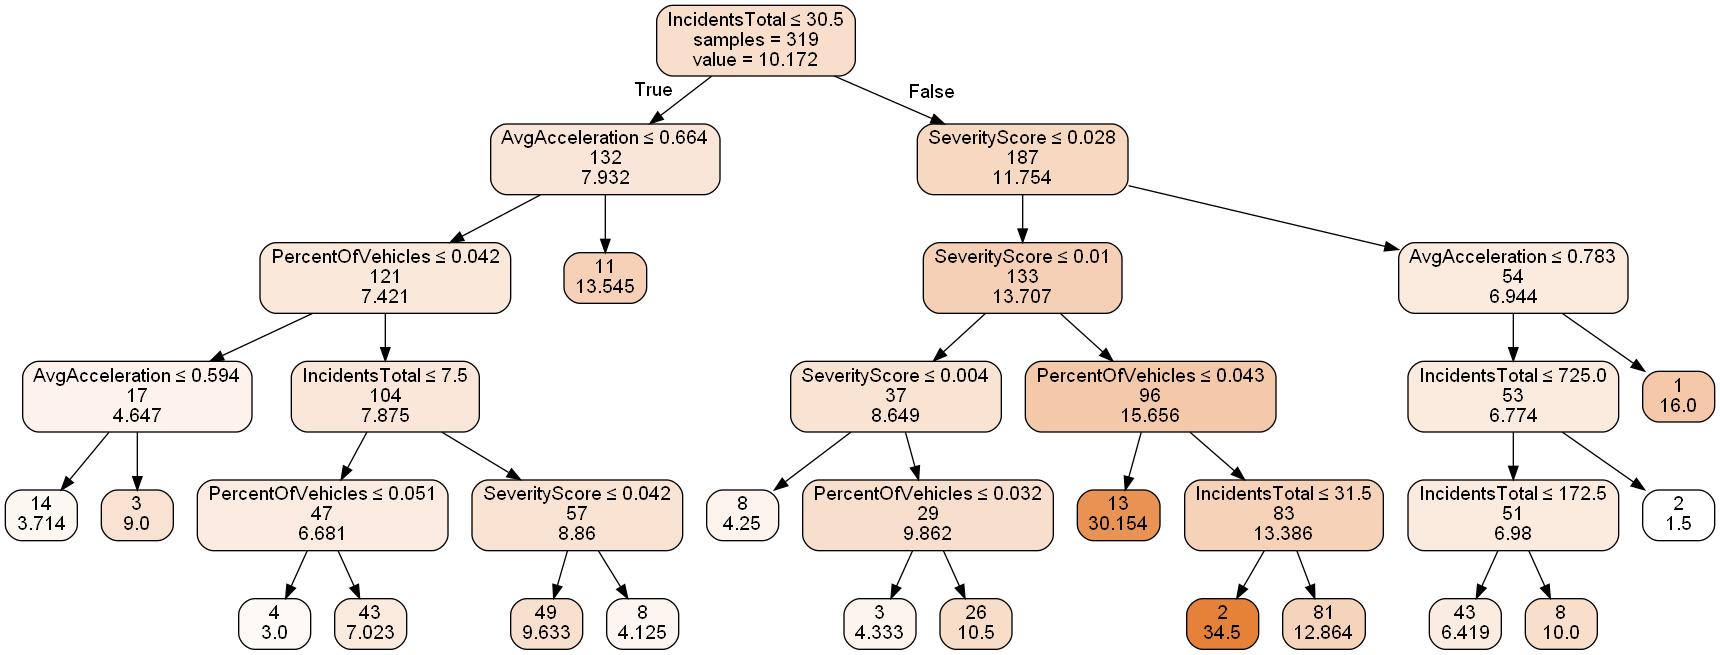

In [70]:
plotDecisionTree(gridSearch.best_estimator_, feature_names = X.columns)

In [71]:
print(regressionSummary(train_Y, gridSearch.best_estimator_.predict(train_X)))
regressionSummary(valid_Y, gridSearch.best_estimator_.predict(valid_X))


Regression statistics

                      Mean Error (ME) : -0.0000
       Root Mean Squared Error (RMSE) : 8.1798
            Mean Absolute Error (MAE) : 5.1016
          Mean Percentage Error (MPE) : -92.2786
Mean Absolute Percentage Error (MAPE) : 118.2209
None

Regression statistics

                      Mean Error (ME) : -0.5328
       Root Mean Squared Error (RMSE) : 7.8547
            Mean Absolute Error (MAE) : 5.8256
          Mean Percentage Error (MPE) : -94.0418
Mean Absolute Percentage Error (MAPE) : 124.2435


In [73]:
rf = RandomForestRegressor(n_estimators = 500, random_state = 1) 
rf.fit(train_X, train_Y) 

RandomForestRegressor(n_estimators=500, random_state=1)

Text(0.5, 1.0, 'Visualizing Important Features')

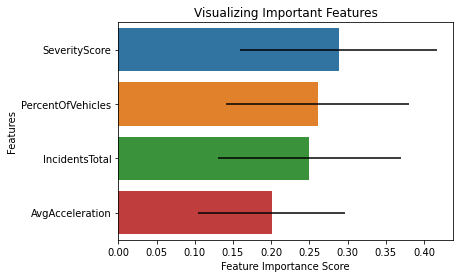

In [74]:
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0) 
tf = pd.DataFrame({'feature': train_X.columns, 'importance': rf.feature_importances_, 'std': std}) 
tf = tf.sort_values('importance', ascending = False)
sns.barplot(x = tf['importance'], y = tf['feature'], xerr = tf['std'])
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")

In [75]:
print(regressionSummary(train_Y, rf.predict(train_X)))
regressionSummary(valid_Y, rf.predict(valid_X))


Regression statistics

                      Mean Error (ME) : -0.1881
       Root Mean Squared Error (RMSE) : 3.7373
            Mean Absolute Error (MAE) : 2.3588
          Mean Percentage Error (MPE) : -45.1698
Mean Absolute Percentage Error (MAPE) : 54.8454
None

Regression statistics

                      Mean Error (ME) : -0.6078
       Root Mean Squared Error (RMSE) : 8.5481
            Mean Absolute Error (MAE) : 5.7200
          Mean Percentage Error (MPE) : -93.2491
Mean Absolute Percentage Error (MAPE) : 117.5082


In [23]:
ultimate_df = road_merge.merge(df3, on = ['LATITUDE', 'LONGITUDE'], how = 'inner')

In [10]:
ultimate_df.drop(['Latitude', 'Longitude'], axis = 1, inplace = True)

In [88]:
ultimate_df = ultimate_df.replace('Yes', 1).replace('<Null>', 0).replace('<Null', 0)

Need to collapse extraneous variables - for curse of dimensionality problem

In [15]:
ultimate_df['LIGHT'] = ultimate_df['LIGHT'].apply(util.lc)
ultimate_df['TRAFFCTL'] = ultimate_df['TRAFFCTL'].apply(util.tc)
ultimate_df['DRIVACT'] = ultimate_df['DRIVACT'].apply(util.actc)
ultimate_df['DRIVCOND'] = ultimate_df['DRIVCOND'].apply(util.condc)
ultimate_df['VEHTYPE'] = ultimate_df['VEHTYPE'].apply(util.vehc)

In [24]:
# no trucks occur as mode - therefore, no medium size will show up in final ultimate_df

ultimate_df['VEHTYPE'].unique()

array(['Automobile, Station Wagon', 'Other', 'Bicycle', '<Null>',
       'Motorcycle'], dtype=object)

In [22]:
print(ultimate_df['DRIVCOND'].unique())
print(ultimate_df['DRIVACT'].unique())
print(ultimate_df['LIGHT'].unique())
print(ultimate_df['TRAFFCTL'].unique())
print(ultimate_df['VEHTYPE'].unique())


['Normal' '<Null>' 'Ability Impaired (Drugs/Alcohol)' 'Inattentive'
 'Unknown' 'Medical or Physical Disability' 'Fatigue' 'Other']
['Driving Properly' '<Null>' 'Improper Turn'
 'Failed to Yield Right of Way' 'Lost control' 'Disobeyed Traffic Control'
 'Other' 'Speed too Fast For Condition' 'Speeding' 'Following too Close']
['Dark' 'Daylight' 'Artificial' 'Dusk']
['No Control' 'Traffic Signal' 'Stop/Yield Sign' 'Pedestrian Crossover']
['Small-size Vehicle' 'Other' 'Large-size Vehicle' 'Two Wheeler']


In [84]:
ultimate_df = pd.get_dummies(ultimate_df)

In [85]:
ultimate_df.shape

(532, 119)

In [26]:
X = ultimate_df[[col for col in ultimate_df.columns if col not in ('LATITUDE', 'LONGITUDE', 'COUNT')]]
Y = ultimate_df['COUNT']

train_X, valid_X, train_Y, valid_Y =  train_test_split(X, Y, test_size = 0.4, random_state = 1)

In [73]:
linear_model = LinearRegression()
linear_model.fit(train_X, train_Y)

LinearRegression()

In [75]:
print(regressionSummary(train_Y, linear_model.predict(train_X)))
regressionSummary(valid_Y, linear_model.predict(valid_X))


Regression statistics

                      Mean Error (ME) : -0.0000
       Root Mean Squared Error (RMSE) : 9.3181
            Mean Absolute Error (MAE) : 5.9639
          Mean Percentage Error (MPE) : -68.1219
Mean Absolute Percentage Error (MAPE) : 106.4703
None

Regression statistics

                      Mean Error (ME) : -0.7673
       Root Mean Squared Error (RMSE) : 9.3887
            Mean Absolute Error (MAE) : 6.1342
          Mean Percentage Error (MPE) : -122.8230
Mean Absolute Percentage Error (MAPE) : 150.8725


In [90]:
pd.DataFrame({'Feature': train_X.columns, 'coefficients': linear_model.coef_})

,Feature,coefficients
0,AvgAcceleration,1.392362e+01
1,PercentOfVehicles,-1.212774e+02
2,IncidentsTotal,5.775146e-04
3,RDSFCOND_Dry,-6.353704e-01
4,RDSFCOND_Ice,-8.881784e-16
5,RDSFCOND_Wet,6.353704e-01
6,VISIBILITY_Clear,4.792866e+00
7,VISIBILITY_Freezing Rain,-1.421085e-14
8,VISIBILITY_Rain,-4.792866e+00
9,LIGHT_Dark,-3.042662e+00


In [69]:
gridSearch = GridSearchCV(DecisionTreeRegressor(random_state = 1), param_grid, cv = 5, n_jobs = -1)
gridSearch.fit(train_X, train_Y)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=1), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 15, 20, 25, 35, 50],
                         'min_impurity_decrease': [0.05, 0.02, 0.01, 0.001],
                         'min_samples_split': [0.1, 0.07, 0.05, 0.01, 0.005]})

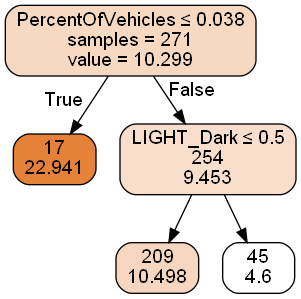

In [70]:
plotDecisionTree(gridSearch.best_estimator_, feature_names = X.columns)

In [71]:
print(regressionSummary(train_Y, gridSearch.best_estimator_.predict(train_X)))
regressionSummary(valid_Y, gridSearch.best_estimator_.predict(valid_X))


Regression statistics

                      Mean Error (ME) : 0.0000
       Root Mean Squared Error (RMSE) : 9.3461
            Mean Absolute Error (MAE) : 5.9512
          Mean Percentage Error (MPE) : -91.8122
Mean Absolute Percentage Error (MAPE) : 117.1719
None

Regression statistics

                      Mean Error (ME) : -0.5573
       Root Mean Squared Error (RMSE) : 9.8075
            Mean Absolute Error (MAE) : 6.4448
          Mean Percentage Error (MPE) : -131.3045
Mean Absolute Percentage Error (MAPE) : 158.4979


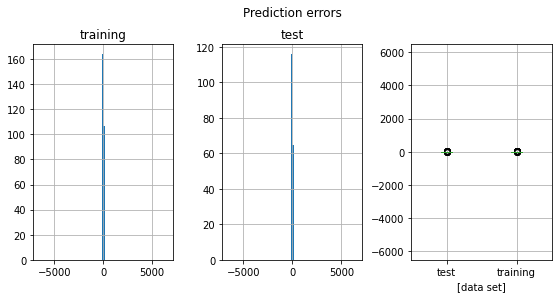

In [78]:
pred_error_train = pd.DataFrame({ 
 'residual': train_Y - linear_model.predict(train_X), 
 'data set': 'training' 
}) 
pred_error_test = pd.DataFrame({ 
 'residual': valid_Y - linear_model.predict(valid_X), 
 'data set': 'test' 
}) 

boxdata_df = pred_error_train.append(pred_error_test, ignore_index=True) 
fig, axes = plt.subplots(nrows=1, ncols=3) 
fig.set_size_inches(9, 4) 
common = {'bins': 100, 'range': [-6500, 6500]} 
pred_error_train.hist(ax=axes[0], **common) 
pred_error_test.hist(ax=axes[1], **common) 
boxdata_df.boxplot(ax=axes[2], by = 'data set') 
axes[0].set_title('training') 
axes[1].set_title('test') 
axes[2].set_title(' ') 
axes[2].set_ylim(-6500, 6500) 
plt.suptitle('Prediction errors') 
plt.subplots_adjust(bottom=0.1, top=0.85, wspace=0.35) 
#plt.show() 